In [1]:
import sys
import seaborn as sns
sys.path.append("..")
%matplotlib inline
sns.set(rc={'image.cmap': 'Purples_r'})

#Experiment Database

In [14]:
import lib.ngdb as ngdb
import lib.ngsimu as ngsimu

Using *ngdb* instead of *ngsimu*, we create Experiments objects that are re-usable via a database. Execute the code below, and a second time for the graph().show() part, you will notice the difference between the 2 libs (testexp is ngdb. Experiment, testexp2 is ngsimu.Experiment).

In [15]:
M=5
W=10
voctype="sparse"
strat={"strattype":"naive"}
nb_ag=10
T_step=10

testexp=ngdb.Experiment(voctype,strat,nb_ag,M,W,T_step)
testexp
testexp2=ngsimu.Experiment(voctype,strat,nb_ag,M,W,T_step)
testexp2

In [16]:
testexp.continue_exp_until(3000)
testexp2.continue_exp_until(3000)

In [17]:
testexp.graph("entropy").show()


NameError: global name 'ind' is not defined

In [ ]:
testexp2.graph("entropy").show()

In [8]:
len(gr2.stdvec[0])
#len(gr2._Y[0])


NameError: name 'gr2' is not defined

In [9]:
db=ngdb.NamingGamesDB()

In [10]:
testexp3=db.get_experiment(M=M,strat=strat,W=5,voctype=voctype,nbagent=nb_ag,step=T_step)

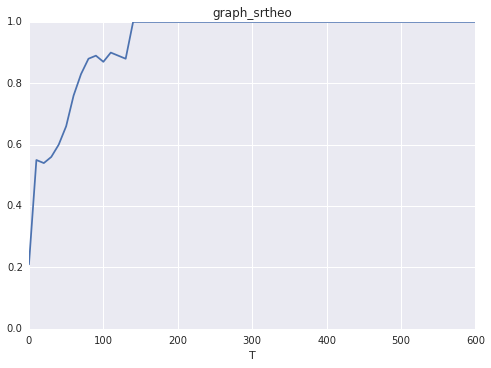

In [11]:
testexp3.continue_exp_until(600)
testexp3.graph().show()